### Source Detection Tutorial
Next we will want to create a catalog of galaxies in the images. To do this, we must be able to detect objects in the image. This will be done using source detection which give every pixel a label, so that pixels with the same label will be part of the same source. Areas of the image declared a source must have some value greater than the background noise.

In [9]:

#-Importing all the modules we will need-
import photutils as pho
import matplotlib.pyplot as plt
from astropy.io import fits
from photutils.segmentation import detect_sources
from photutils.segmentation import deblend_sources

In [10]:
#-Opening all the files we need-
data = fits.open(f"../test_data/f200w_i2d.fits")   #Opening our file 
sci = data['SCI'].data  #Defining our science map
err = data['ERR'].data  #Defining our error map



To detect our sources, a pixel must have a greater value than some threshold value, usually a multiple of the background noise.The image is usually filtered before source detection to remove background npise and make the source detection more accurate.
Here, the significance of each pixel will be its value on the SCI map (brigtness) divided by its error.

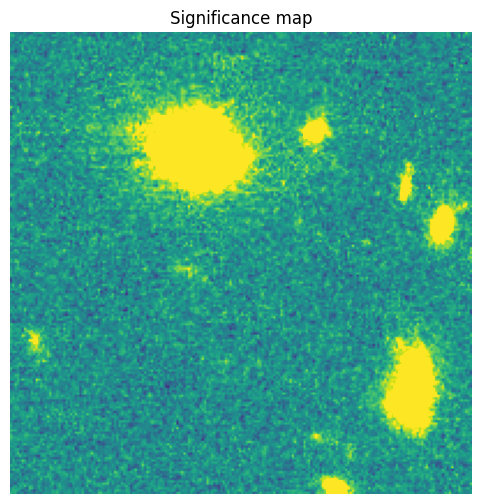

In [11]:
#-Plotting significance map-
threshold=2.5 #defining our value for the threshold
sig=sci/err
fig1,ax1=plt.subplots(1,1,figsize=(6,6))
ax1.imshow(sig,vmin=-threshold,vmax=threshold)
ax1.set_title("Significance map")
ax1.set_axis_off()



So now we are ready to detect our sources, this is done relatively simply in a couple of lines of code. The code will show a map of our detected sources and give each source a label. There is a possibility that two seperate objects that are close together will ge given as part of the same source depending on our threshold value and significance. This is an issue we will fix later when we get to deblending.
To detect our sources, the program will look for connected pixels of similar values, if there is a connected pixel with a maximum value; larger than any pixel around it. That pixel will be a source.

<photutils.segmentation.core.SegmentationImage>
shape: (200, 200)
nlabels: 9
labels: [1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Source Map')

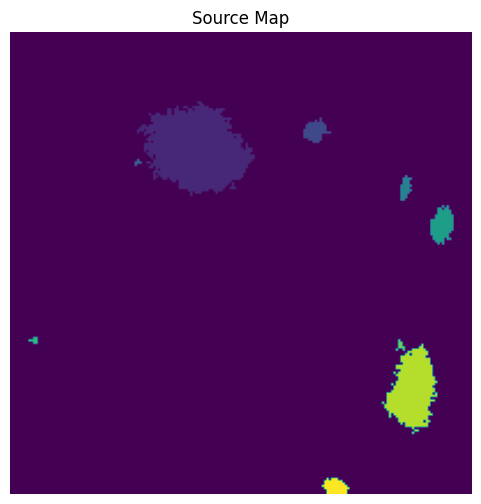

In [12]:
#-Creating our source map-

source_map = detect_sources(sig, threshold, npixels=5)  #This line of code does most of the work detecting the sources.
print(source_map)

#-Plotting the final image-
fig2,ax2=plt.subplots(1,1,figsize=(6,6))
ax2.imshow(source_map)
ax2.set_axis_off()
ax2.set_title("Source Map")


So now each area of colour has detected a what it thinks to be a source. However, two sources close together could be detected as a single source. This is what we will adress in deblending.

### Deblending
Two otherwise close objects such as interacting galaxies can be given as part of the same source even thoug they are two seperate objects. To get the code to recognise this we will use a technique called deblending where techniqies such as watershed segentation can be used. This is where the image is looked at like a topographic map of pixel significance. Here a saddle point between the objects can be identified and the objects can be seperated.

<photutils.segmentation.core.SegmentationImage>
shape: (200, 200)
nlabels: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]


Text(0.5, 1.0, 'Deblended Source Map')

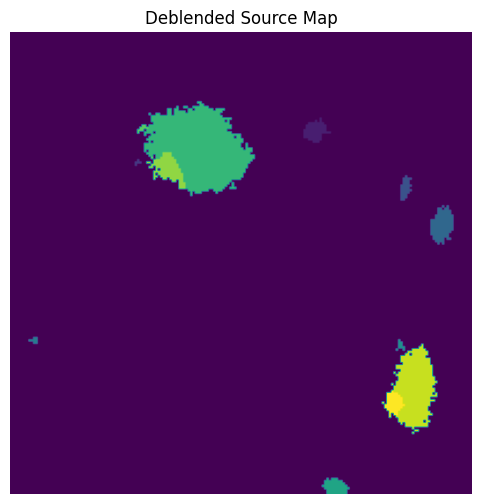

In [19]:
#-Deblending-
deblend_map=deblend_sources(sci,source_map,npixels=5) #Again this line of code does most of the work here.

#-Plotting the image-
fig3,ax3=plt.subplots(1,1,figsize=(6,6))
ax3.imshow(deblend_map)
print(deblend_map)
ax3.set_axis_off()
ax3.set_title("Deblended Source Map")